<a href="https://colab.research.google.com/github/kaho-cell/kaggle/blob/main/kaggle_air_pollution2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#必要なライブラリをインポート
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

import pandas as pd
import numpy as np

#ランダムシードの設定
import random
np.random.seed(1234)
random.seed(1234)

#データの読み込み
train_df = pd.read_csv("/content/drive/MyDrive/kaggle/air_ppllution/data/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/kaggle/air_ppllution/data/test.csv")
submission = pd.read_csv("/content/drive/MyDrive/kaggle/air_ppllution/data/sample_submission.csv")

In [ ]:
#データの確認
train_df.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


In [ ]:
#train_dfからdate_timeとtarget_carbon_monoxideのみを取り出した時系列データを作成
train_df_ts = train_df[["date_time", "target_carbon_monoxide"]]
train_df_ts.set_index("date_time", inplace=True)

In [ ]:
train_df_ts

,target_carbon_monoxide
date_time,
2010-03-10 18:00:00,2.5
2010-03-10 19:00:00,2.1
2010-03-10 20:00:00,2.2
2010-03-10 21:00:00,2.2
2010-03-10 22:00:00,1.5
...,...
2010-12-31 20:00:00,1.3
2010-12-31 21:00:00,1.4
2010-12-31 22:00:00,1.6


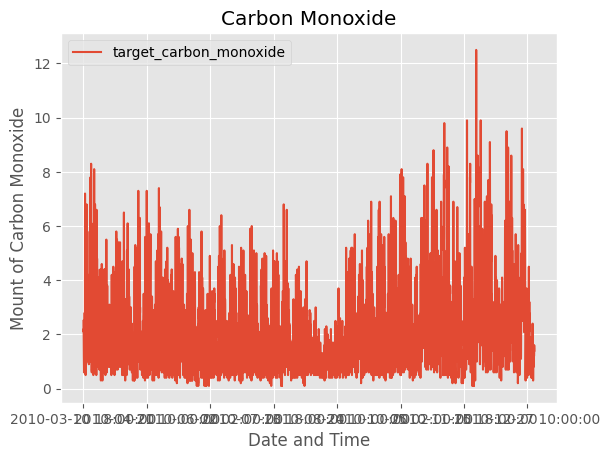

In [ ]:
#
# 時系列データのグラフ化（折れ線グラフ）
#

train_df_ts.plot()
plt.title('Carbon Monoxide')                            #グラフタイトル
plt.ylabel('Mount of Carbon Monoxide') #タテ軸のラベル
plt.xlabel('Date and Time')                                #ヨコ軸のラベル
plt.show()

In [ ]:
#2010年3月10日から2010年3月31日のデータを可視化
train_df_ts["2010-03-10 18:00:00": "2010-03-31-23:00:00"]

,target_carbon_monoxide
date_time,
2010-03-10 18:00:00,2.5
2010-03-10 19:00:00,2.1
2010-03-10 20:00:00,2.2
2010-03-10 21:00:00,2.2
2010-03-10 22:00:00,1.5
...,...
2010-03-31 19:00:00,2.6
2010-03-31 20:00:00,2.4
2010-03-31 21:00:00,1.5


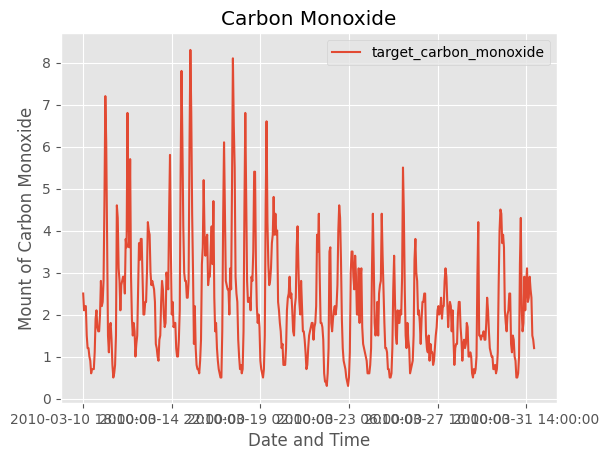

In [ ]:
#
# 時系列データのグラフ化(2010年3月10日から2010年3月31日)（折れ線グラフ）
#

train_df_ts["2010-03-10 18:00:00": "2010-03-31-23:00:00"].plot()
plt.title('Carbon Monoxide')                            #グラフタイトル
plt.ylabel('Mount of Carbon Monoxide') #タテ軸のラベル
plt.xlabel('Date and Time')                                #ヨコ軸のラベル
plt.show()

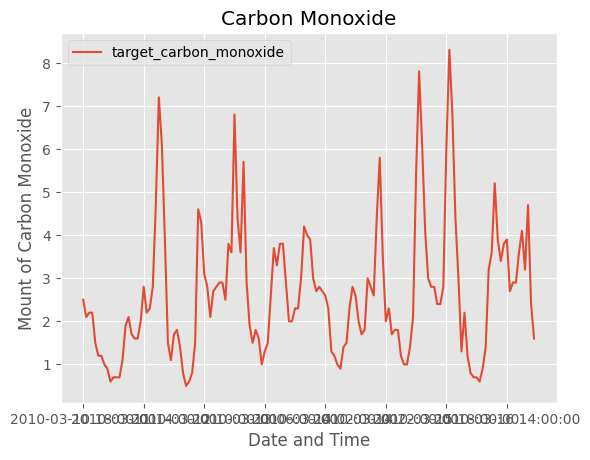

In [ ]:
#
# 時系列データのグラフ化(2010年3月10日から2010年3月16日)（折れ線グラフ）
#

train_df_ts["2010-03-10 18:00:00": "2010-03-16-23:00:00"].plot()
plt.title('Carbon Monoxide')                            #グラフタイトル
plt.ylabel('Mount of Carbon Monoxide') #タテ軸のラベル
plt.xlabel('Date and Time')                                #ヨコ軸のラベル
plt.show()

In [ ]:
#24時間(1日)周期があることが分かる

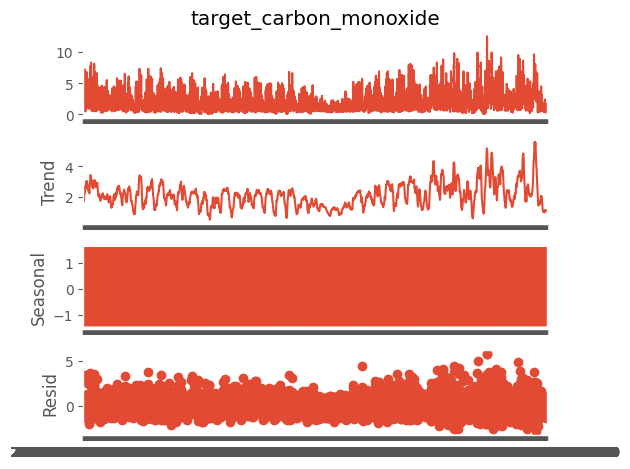

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
#
# 移動平均法を利用した分解（加法モデルを仮定）
#

# 成分分解
result=seasonal_decompose(
    train_df_ts.target_carbon_monoxide,
    model='additive',
    period=24)

# グラフ化
result.plot()
plt.show()

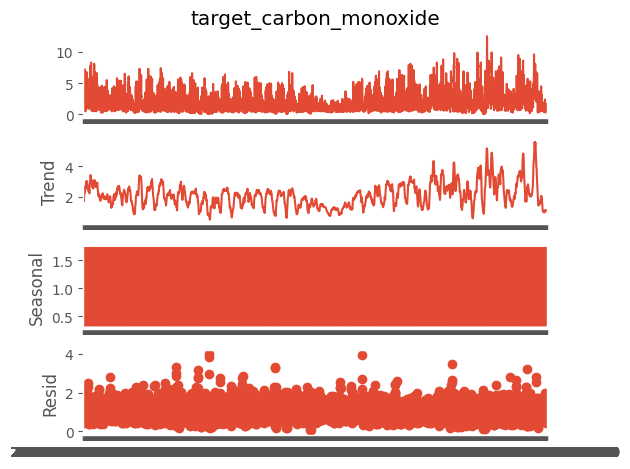

In [ ]:
#
# 移動平均法を利用した分解（乗法モデルを仮定）
#

# 成分分解
result=seasonal_decompose(
    train_df_ts.target_carbon_monoxide,
    model='multiplicative',
    period=24)

# グラフ化
result.plot()
plt.show()

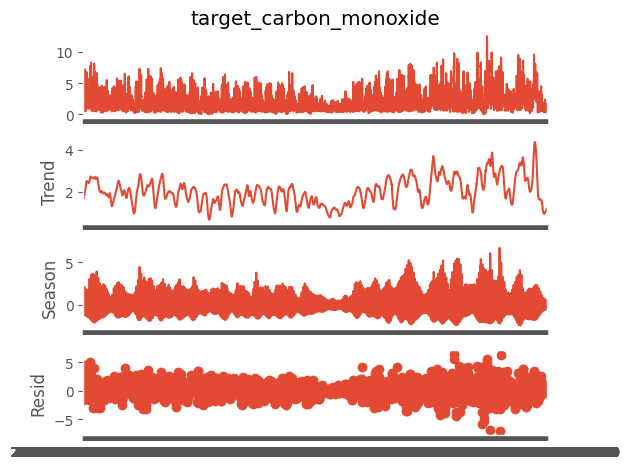

In [ ]:
#
# STL分解（LOESS平滑化を利用した分解）
#
from statsmodels.tsa.seasonal import STL
# 成分分解
stl=STL(
    train_df_ts.target_carbon_monoxide,
    period=24,
    robust=True).fit()

# STL分解結果のグラフ化
stl.plot()
plt.show()

In [ ]:
#
# 原系列に対するADF検定
#
from statsmodels.tsa.stattools import adfuller

# ADF検定
dftest = adfuller(train_df_ts.target_carbon_monoxide)

# 出力
print('ADF Statistic:', dftest[0])
print('p-value:', dftest[1])
print('Critical values:')
for i, j in dftest[4].items():
    print('\t', i, j)

ADF Statistic: -8.98210258477204
p-value: 7.263413572494878e-15
Critical values:
	 1% -3.4312743568595447
	 5% -2.8619484921683713
	 10% -2.5669874363317224


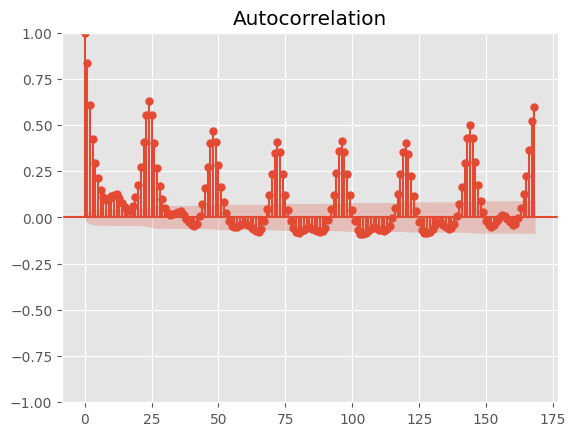

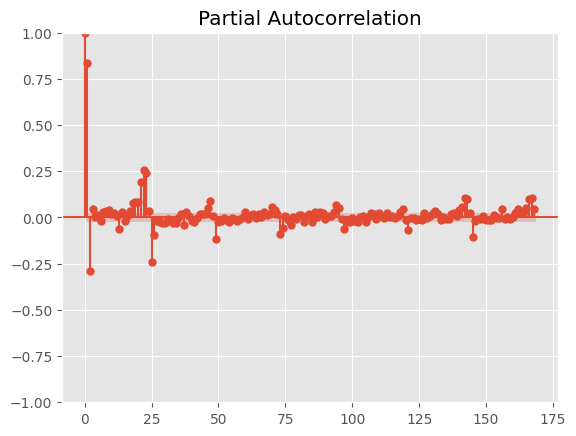

In [ ]:
#
# 原系列の自己相関
#
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(train_df_ts.target_carbon_monoxide, lags=168)   #自己相関
pacf = plot_pacf(train_df_ts.target_carbon_monoxide, lags=168) #偏自己相関

In [ ]:
!python --version

Python 3.11.11


In [ ]:
#pythonのバージョンを下げる
!sudo apt install python3.10

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.10 is already the newest version (3.10.12-1~22.04.9).
python3.10 set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
!sudo update-alternatives --config python3

There are 2 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                 Priority   Status
------------------------------------------------------------
* 0            /usr/bin/python3.11   2         auto mode
  1            /usr/bin/python3.10   1         manual mode
  2            /usr/bin/python3.11   2         manual mode

Press <enter> to keep the current choice[*], or type selection number: 1
update-alternatives: using /usr/bin/python3.10 to provide /usr/bin/python3 (python3) in manual mode


In [ ]:
!apt-get install python3.10-distutils
!apt-get install python3-pip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'python3-distutils' instead of 'python3.10-distutils'
python3-distutils is already the newest version (3.10.8-1~22.04).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-setuptools python3-wheel
Suggested packages:
  python-setuptools-doc
The following NEW packages will be installed:
  python3-pip python3-setuptools python3-wheel
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 1,677 kB of archives.
After this operation, 8,968 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-setuptools all 59.6.0-1.2ubuntu0.22.04.2 [340 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-wheel all 0.37.

In [ ]:
!pip list

Package            Version
------------------ -------------
blinker            1.4
cryptography       3.4.8
dbus-python        1.2.18
distro             1.7.0
httplib2           0.20.2
importlib-metadata 4.6.4
jeepney            0.7.1
keyring            23.5.0
launchpadlib       1.10.16
lazr.restfulclient 0.14.4
lazr.uri           1.0.6
Mako               1.1.3
Markdown           3.3.6
MarkupSafe         2.0.1
more-itertools     8.10.0
oauthlib           3.2.0
pip                22.0.2
PyGObject          3.42.1
PyJWT              2.3.0
pyparsing          2.4.7
python-apt         2.4.0+ubuntu4
SecretStorage      3.3.1
setuptools         59.6.0
six                1.16.0
wadllib            1.3.6
wheel              0.37.1
zipp               1.0.0


In [ ]:
!pip install scikit-learn==1.2.2

In [ ]:
!pip uninstall numpy

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/lib/python3.10/dist-packages/numpy-1.26.4.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-1.26.4


In [ ]:
!pip install numpy==1.23.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 55.5 MB/s eta 0:00:00


In [ ]:
!pip uninstall pmdarima

Found existing installation: pmdarima 1.8.5
Uninstalling pmdarima-1.8.5:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/pmdarima-1.8.5.dist-info/*
    /usr/local/lib/python3.10/dist-packages/pmdarima/*
Proceed (Y/n)? Y
  Successfully uninstalled pmdarima-1.8.5


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.0 MB/s eta 0:00:00


In [ ]:
!pip list

Package            Version
------------------ -------------
blinker            1.4
cryptography       3.4.8
Cython             3.0.12
dbus-python        1.2.18
distro             1.7.0
httplib2           0.20.2
importlib-metadata 4.6.4
jeepney            0.7.1
joblib             1.4.2
keyring            23.5.0
launchpadlib       1.10.16
lazr.restfulclient 0.14.4
lazr.uri           1.0.6
Mako               1.1.3
Markdown           3.3.6
MarkupSafe         2.0.1
more-itertools     8.10.0
numpy              1.26.4
oauthlib           3.2.0
packaging          24.2
pandas             2.2.3
patsy              1.0.1
pip                22.0.2
pmdarima           1.8.5
PyGObject          3.42.1
PyJWT              2.3.0
pyparsing          2.4.7
python-apt         2.4.0+ubuntu4
python-dateutil    2.9.0.post0
pytz               2025.1
scikit-learn       1.2.2
scipy              1.15.2
SecretStorage      3.3.1
setuptools         59.6.0
six                1.16.0
statsmodels        0.14.4
threadpoolctl

In [ ]:
!python --version

Python 3.10.12


In [ ]:
#
# 必要なモジュールの読み込み
#

import numpy as np
import pandas as pd
import datetime

from pmdarima import auto_arima
from pmdarima.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフスタイル
plt.rcParams['figure.figsize'] = [12, 9] #グラフサイズ
plt.rcParams['font.size'] = 14 #フォントサイズ

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject